In [1]:
import tensorflow as tf

# Configurar la GPU antes de inicializar TensorFlow
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, Normalizer, RobustScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay,confusion_matrix, accuracy_score,recall_score,f1_score,precision_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.regularizers import l2, l1, l1_l2
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
from tensorflow.keras import regularizers
from sklearn.compose import ColumnTransformer
from tensorflow.keras.losses import CategoricalCrossentropy, sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau





# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:

df=pd.read_csv(r"/home/vicevil/Documentos/df_malware_unido_solo_cat_y_escalar.csv")

In [3]:
df=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_unido_solo_cat_y_escalar.csv")

In [9]:
df

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,Malicious
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,192.168.1.195,123.0,89.221.210.188,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25010999,192.168.1.195,37306.0,102.165.48.81,17769.0,tcp,S1,0.0,ShAdDaT,8952.0,483602.0,9613.0,520116.0,2019,9,20,1,4,Malicious
25011000,192.168.1.195,123.0,212.111.30.190,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign
25011001,192.168.1.195,123.0,5.1.56.123,123.0,udp,SF,0.0,Dd,2.0,152.0,2.0,152.0,2019,9,21,0,5,Benign


MAPEAMOS LA TARGET

In [4]:
df["Target"]= df["Target"].apply(lambda x: 0 if x == "Malicious" else 1)

In [ ]:

#df.drop(columns={"history"}, inplace=True) AL SER VALORES PREVIO, ES MEJOR NO TENERLOS EN CUENTA PARA EL ESTUDUIO QUE QUIERE CONSEGUIR DETECTAR MALWARE EN TIEMPO REAL, POR LO QUE ES MEJOR QUE SOLO TENGA EN CUENTA LOS VALORES QUE TENDRA EN TIEMPO REAL PARA SU DETECCION

In [44]:
df.head()

,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal,Target
0,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,1
1,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,1
2,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,1
3,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,S0,0.0,S,3.0,180.0,0.0,0.0,2018,5,9,15,2,1
4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,S0,0.0,S,1.0,60.0,0.0,0.0,2018,5,9,15,2,1


In [5]:
cat= ['proto','conn_state','id.resp_h', "id.orig_h","history"]
num=[  'missed_bytes', 'id.orig_p','id.resp_p','orig_pkts', 'orig_ip_bytes','resp_pkts', 'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora','dia_semanal']


ESTUDIAMOS CORRELACIONES DEL DATASET

In [41]:
correlacion=np.abs(df[num].corr())

In [42]:
correlacion

,missed_bytes,id.orig_p,id.resp_p,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,anyo,mes,dia,hora,dia_semanal
missed_bytes,1.000000e+00,0.000190,0.000087,6.355651e-08,2.425040e-07,0.000671,0.000409,0.000124,0.000198,0.000023,9.750739e-07,0.000220
id.orig_p,1.904359e-04,1.000000,0.170480,3.206039e-04,2.708594e-04,0.000907,0.001756,0.011032,0.030245,0.122964,6.501087e-02,0.182007
id.resp_p,8.736641e-05,0.170480,1.000000,2.035521e-04,1.475625e-04,0.001272,0.001727,0.624627,0.006973,0.136001,4.563018e-01,0.077981
orig_pkts,6.355651e-08,0.000321,0.000204,1.000000e+00,8.057485e-01,0.000215,0.000120,0.000958,0.000091,0.000144,6.269441e-04,0.000204
orig_ip_bytes,2.425040e-07,0.000271,0.000148,8.057485e-01,1.000000e+00,0.000255,0.000149,0.001059,0.000161,0.000339,3.943269e-04,0.000117
resp_pkts,6.710705e-04,0.000907,0.001272,2.153829e-04,2.549653e-04,1.000000,0.562942,0.001321,0.002767,0.004156,1.519776e-04,0.000547
resp_ip_bytes,4.094239e-04,0.001756,0.001727,1.196478e-04,1.494836e-04,0.562942,1.000000,0.001298,0.003524,0.003031,1.213457e-04,0.000538
anyo,1.243974e-04,0.011032,0.624627,9.577270e-04,1.058839e-03,0.001321,0.001298,1.000000,0.530378,0.296260,3.587630e-01,0.056158
mes,1.979458e-04,0.030245,0.006973,9.096150e-05,1.607100e-04,0.002767,0.003524,0.530378,1.000000,0.154738,9.887303e-02,0.591388
dia,2.301578e-05,0.122964,0.136001,1.444959e-04,3.394250e-04,0.004156,0.003031,0.296260,0.154738,1.000000,2.691382e-01,0.289592


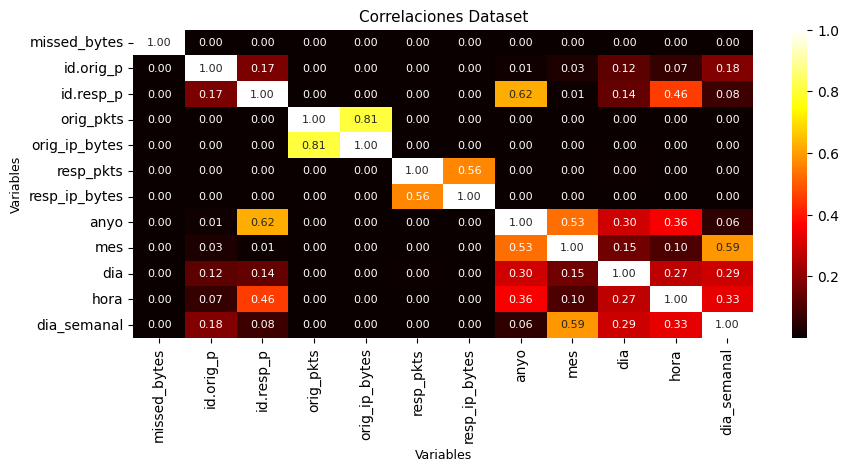

In [43]:
plt.figure(figsize=(10,4))
sns.heatmap(correlacion, annot=True,annot_kws={"fontsize": 8}, cmap="hot", fmt=".2f")
plt.title("Correlaciones Dataset",fontsize=11)
plt.xlabel("Variables",fontsize=9)
plt.ylabel("Variables",fontsize=9)
plt.show()

1. Se va a proceder a eliminar las variables siguientes:
    - DIA.- Presenta un valor de correlación de 0.27 igual que hora, quedandonos con este ultimo, debido a que es mas interesante conocer el intervalo horario de los ataques.
    - RESP_IP_BYTES y ORIG_IP_BYTES.- Tienen un valor de 0.56, idéntico a RESP_PKTS y ORIG_PKTS, siendo estas últimas más interesantes, ya que acumulan los paquetes de datos que pueden contener malware, y las que se eliminan sólo tiene los bytes enviados.
    - ID.ORIG_P.- por la misma razaon que la anterior, al tener el mismo valorque id.resp_p
    - MISSED_BYTES.- Al ser dificil de interpretar y carecer de relacion alguna con las variables.
    

In [47]:
columns_correla=["dia","resp_ip_bytes","orig_ip_bytes","id.orig_p","missed_bytes"]

In [6]:
df.columns

Index(['id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
       'conn_state', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora', 'dia_semanal', 'Target'],
      dtype='object')

OUTLAYERS

In [7]:
df_outlayers= df.copy()

In [8]:
#itero por las columnas nuemricas sacando la media y la std de cada columna
for column in df_outlayers.select_dtypes(include=['number']):
    # Calcular la media y la desviación estándar
    mean = df_outlayers[column].mean()
    std = df_outlayers[column].std()
    
#  crearemos una nueva columna con la terminacion _zscore, con el calculo del valor Z que es la resta del valor de cada columna menos la media total dividido entre la std media( si >3 o <3 lo consideramos outlayers)
df_outlayers[column + '_zscore'] = (df_outlayers[column] - mean) / std


In [11]:
#elimino las columnas antiguas
df_outlayers.drop(columns={'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p', 'proto',
       'conn_state', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'anyo', 'mes', 'dia', 'hora', 'dia_semanal', 'Target'}, inplace=True)

In [12]:
# solo columnas numericas menos  las categoricas que son 5
df_outlayers

,id.orig_p_zscore,id.resp_p_zscore,missed_bytes_zscore,orig_pkts_zscore,orig_ip_bytes_zscore,resp_pkts_zscore,resp_ip_bytes_zscore,anyo_zscore,mes_zscore,dia_zscore,hora_zscore,dia_semanal_zscore
0,0.721750,-0.436876,-0.0002,-0.000600,-0.000596,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371
1,1.018855,-0.436876,-0.0002,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371
2,0.074036,-0.436876,-0.0002,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371
3,1.304711,-0.436876,-0.0002,-0.000600,-0.000596,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371
4,0.272892,-0.436876,-0.0002,-0.000714,-0.000771,-0.003498,-0.004663,-0.622184,-1.087271,-2.059546,0.259651,-1.675371
...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,-2.472452,-0.432367,-0.0002,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480,1.099460
25010999,-0.161796,0.363413,-0.0002,0.510430,0.702246,2294.616288,1382.563794,1.607241,0.099767,-0.219342,-1.524071,0.174516
25011000,-2.472452,-0.432367,-0.0002,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480,1.099460
25011001,-2.472452,-0.432367,-0.0002,-0.000657,-0.000637,0.473902,0.399383,1.607241,0.099767,-0.052050,-1.651480,1.099460


In [15]:
df_outlayers.columns

Index(['id.orig_p_zscore', 'id.resp_p_zscore', 'missed_bytes_zscore',
       'orig_pkts_zscore', 'orig_ip_bytes_zscore', 'resp_pkts_zscore',
       'resp_ip_bytes_zscore', 'anyo_zscore', 'mes_zscore', 'dia_zscore',
       'hora_zscore', 'dia_semanal_zscore'],
      dtype='object')

In [19]:
for col in df_outlayers:
    result=df_outlayers[col].sum()/len(df_outlayers[col])
    print(f"columna:{col} = {np.abs(result)}")

columna:id.orig_p_zscore = 3.882788453153263e-16
columna:id.resp_p_zscore = 1.8476438468734133e-16
columna:missed_bytes_zscore = 7.959947677557436e-18
columna:orig_pkts_zscore = 8.136396590000516e-19
columna:orig_ip_bytes_zscore = 3.6818330937991164e-19
columna:resp_pkts_zscore = 3.872742957922034e-18
columna:resp_ip_bytes_zscore = 7.345484295777002e-18
columna:anyo_zscore = 4.1141639357135107e-14
columna:mes_zscore = 5.113490596774007e-15
columna:dia_zscore = 6.380471296419299e-15
columna:hora_zscore = 1.1697956469402196e-15
columna:dia_semanal_zscore = 7.177309751008296e-15


VOY A ELIMINAR TODAS LA NUMERICAS EQUIVALENTES CON  VALORES Z SUPERIORES A 5, QUE ES LA MEDIA DE OUTLAYERS POR COLUMNA

In [53]:
bt.obtener_estadisticas(df)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
id.orig_h,0.09,object,No,192.168.1.196,No,No,No,No,No,categorica ordinal,0.0
id.orig_p,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
id.resp_h,46.6,object,No,162.248.88.215,No,No,No,No,No,categorica ordinal,0.0
id.resp_p,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
proto,0.0,object,No,tcp,No,No,No,No,No,categorica ordinal,0.0
conn_state,0.0,object,No,S0,No,No,No,No,No,categorica ordinal,0.0
missed_bytes,0.0,float64,76.33,No,381679.91,145679555881.059998,0.0,0.0,0.0,numerica continua,0.0
history,0.0,object,No,S,No,No,No,No,No,categorica ordinal,0.1
orig_pkts,0.0,float64,13.5,No,17511.7,306659531.76,1.0,1.0,3.0,numerica continua,0.0
orig_ip_bytes,0.01,float64,590.02,No,687810.32,473083036333.98999,40.0,60.0,180.0,numerica continua,0.0


In [6]:
cat= ['proto','conn_state', "history", "id.orig_h", "id.resp_h"]
num=[  'id.orig_p',"id.resp_p","orig_pkts",'resp_pkts', 'anyo', 'mes', 'hora']
Target="Target"


In [52]:
for cat in df[cat]:
    unicos=df[cat].unique()
    print(f"col: {cat} -- valor: {unicos}")
    print(f"numero: {len(unicos)}")

col: proto -- valor: ['tcp' 'udp' 'icmp']
numero: 3
col: conn_state -- valor: ['S0' 'REJ' 'SF' 'OTH' 'RSTOS0' 'RSTR' 'S2' 'RSTRH' 'RSTO' 'S1' 'SH' 'SHR'
 'S3']
numero: 13
col: history -- valor: ['S' 'Sr' 'D' 'Dd' nan 'R' 'ShAdaFr' 'ShAfFa' 'ShAdfFa' 'ShAF' '^r'
 'ShADadfR' 'ShA' 'ShADr' 'ShADFr' 'ShAdDafF' 'ShAr' 'ShADafr' 'ShADarfF'
 'ShAFr' 'ShAdDaFf' 'ShAdDaTFf' 'ShADF' 'ShAdDaTF' 'SaR' 'ShAdDtafF'
 'ShADadRf' 'ShAdDaFr' 'ShAdDaFRf' 'ShADadfF' 'ShADFadfRR' 'ShADafF'
 'ShAdDatFf' 'ShADadR' 'ShAdtDaFrR' 'ShAdDatFr' 'ShAdtDaFr' 'ShAdDatFrR'
 'ShAdDaFrR' 'ShAdDatfF' 'D^' 'ShADdfFa' 'ShAdDfFr' 'ShAdDafFr' 'ShADrfR'
 'ShADdafR' 'ShAFf' 'ShADaF' 'ShAFa' 'ShAdDaF' 'ShAdF' 'ShAdDafrR'
 'ShAdDafFrR' 'ShADfdtR' 'ShAdDarfR' 'SahAdDrfR' 'Fr' 'ShAdDatrfR'
 'ShADar' 'ShAdDr' 'HaDdR' 'ShADadFf' 'ShAdDaTfF' 'ShAdDTafF' 'ShAdDaTFfR'
 'ShAdDaftF' 'ShAdFaf' 'ShAFfR' 'ShAdDafrFr' 'ShADfFr' 'ShADfrFr' 'ShrA'
 'F' 'ShADafdtF' 'ShAdr' 'ShAdDtaFr' 'ShAdDFar' 'ShAdDarr' 'ShAdDaFfr'
 'HaDdAfF' 'ShAdDaFfR' 'Ha

VOY A ELIMINAR LAS IP PQ SON IDENTIFICADORES CON ALTA CORRELACIONALIDAD Y ADEMAS PRESENTAS DEMASIADOS VALORES UNICOS( 21442 Y 11654579)

In [7]:
#eliminamos 8 columnas y nos quedamos con 10
df.drop(columns={"dia","resp_ip_bytes","orig_ip_bytes","id.orig_p","missed_bytes","dia_semanal","id.orig_h",'id.resp_h'}, inplace=True)

In [8]:
df

,id.resp_p,proto,conn_state,history,orig_pkts,resp_pkts,anyo,mes,hora,Target
0,23.0,tcp,S0,S,3.0,0.0,2018,5,15,0
1,23.0,tcp,S0,S,1.0,0.0,2018,5,15,0
2,23.0,tcp,S0,S,1.0,0.0,2018,5,15,0
3,23.0,tcp,S0,S,3.0,0.0,2018,5,15,0
4,23.0,tcp,S0,S,1.0,0.0,2018,5,15,0
...,...,...,...,...,...,...,...,...,...,...
25010998,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,1
25010999,17769.0,tcp,S1,ShAdDaT,8952.0,9613.0,2019,9,1,0
25011000,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,1
25011001,123.0,udp,SF,Dd,2.0,2.0,2019,9,0,1


Columna: |	Descripción: |	Tipo: |	Orden de entrada: |	Información posterior a la etiqueta "label"|
-|-|-|-|-|
id.resp_p|	 Identificador del puerto del host de respuesta|	Numérico|	1|	No
proto|	Protocolo utilizado (TCP, UDP, ICMP, etc.)|	Categórico|	6|	No
conn_state|	Estado de la conexión (SYN, ACK, FIN, etc.)|	Categórico|	7	|No
history|	Historial de tráfico relacionado con esta conexión o sesión, pudiendo obtener patrones de actividad |	Categórico|	7	|No
orig_pkts|	Número de paquetes enviados por el host de origen|	Numérico|	3|	No
resp_pkts|	Número de paquetes recibidos por el host de destino	|Numérico|	4|	No
anyo|	Año de la conexión|	Numérico|	8|	No
mes|	Mes de la conexión|	Numérico|	9|	No
hora|	Hora de la conexión|	Numérico|	11|	No
Target|	Etiqueta que indica si la conexión es normal o anómala|	Categórica|13	| Target

## MACHINE LEARNING Y  DEEP - LEARNING


TECNICAS DE ESCALADOS 1

- CATEGORICAS

In [25]:
cat= ['proto','conn_state',"history"]

In [10]:
 #Itera sobre las columnas categóricas( oneHotEncoder, pq son categoricas ordinales si fueran nominales funciona mejor labelencoder)
one = OneHotEncoder(handle_unknown="ignore")#se ignora valores que puedan producir nulos y no crea columnas para ello


In [13]:
df_encoded = one.fit_transform(df[cat])

In [14]:
column_hot=one.get_feature_names_out()

In [15]:
len(column_hot)

280

In [16]:
df_encoded.shape

(25011003, 280)

In [17]:
#la convierto a  matriz densa o array pq con sparse da error
df_encoded_dense = df_encoded.toarray()

In [18]:
df_one=pd.DataFrame(df_encoded_dense, columns= column_hot)


In [19]:
df_one.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_one_hot_categoricas.csv", index=False)

In [20]:
df.to_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total\original\df_malware_10_corela_outlayer_3cat_7num.csv", index=False)

In [23]:
df_one.proto_icmp.dtype

dtype('float64')

- NUMERICAS

Index(['id.resp_p', 'orig_pkts', 'resp_pkts', 'anyo', 'mes', 'hora', 'Target'], dtype='object')

In [47]:
df_ml.shape

(25011003, 7)

In [43]:
df_rn

,0,1,2,3,4,5,6
0,0.011396,0.001486,0.000000,0.999903,0.002477,0.007432,0.000000
1,0.011396,0.000495,0.000000,0.999904,0.002477,0.007432,0.000000
2,0.011396,0.000495,0.000000,0.999904,0.002477,0.007432,0.000000
3,0.011396,0.001486,0.000000,0.999903,0.002477,0.007432,0.000000
4,0.011396,0.000495,0.000000,0.999904,0.002477,0.007432,0.000000
...,...,...,...,...,...,...,...
25010998,0.060808,0.000989,0.000989,0.998138,0.004449,0.000000,0.000494
25010999,0.800794,0.403439,0.433228,0.090990,0.000406,0.000045,0.000000
25011000,0.060808,0.000989,0.000989,0.998138,0.004449,0.000000,0.000494
25011001,0.060808,0.000989,0.000989,0.998138,0.004449,0.000000,0.000494


In [51]:
df_one.proto_icmp.dtype

dtype('float64')

In [ ]:
"""#minmax redodenando a numeros enterros 0 y 1
columnas_numericas = df.drop(["Target"], axis=1).select_dtypes(include=['number'])
#instacio
scaler = MinMaxScaler()

# Escalo datos
col_num_scal = scaler.fit_transform(columnas_numericas)

# rangos que queremos
rango_deseado_min = 0
rango_deseado_max = 1

# Multiplica los datos x los rangos
col_num_scal_rangos= col_num_scal * (rango_deseado_max - rango_deseado_min) + rango_deseado_min

# Redondea los datos escalados rescalados al entero más cercano
col_num_scal_round = pd.DataFrame(col_num_scal_rangos).round().astype(int)

# Concatena los datos rescalados enteros con la columna "Target" y el resto del DataFrame original
df = pd.concat([df["Target"], col_num_scal_round], axis=1)"""


dtype('float64')

APLICAMOS PARA RF LABELENCODER Y MINMAX 

In [28]:
 #Itera sobre las columnas categóricas(LABEL-ENCONDER)
for col in df_rf.columns[df_rf.dtypes == 'object']:  
    cat = LabelEncoder()
    df_rf[col] = cat.fit_transform(df_rf[col]) 
    

SPLIT RF 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3246823
         1.0       1.00      1.00      1.00   1755378

    accuracy                           1.00   5002201
   macro avg       1.00      1.00      1.00   5002201
weighted avg       1.00      1.00      1.00   5002201



In [39]:
df.columns

Index(['id.orig_p', 'id.resp_h', 'id.resp_p', 'proto', 'conn_state',
       'missed_bytes', 'orig_pkts', 'resp_pkts', 'anyo', 'mes', 'hora',
       'dia_semanal', 'Target'],
      dtype='object')

(12,)

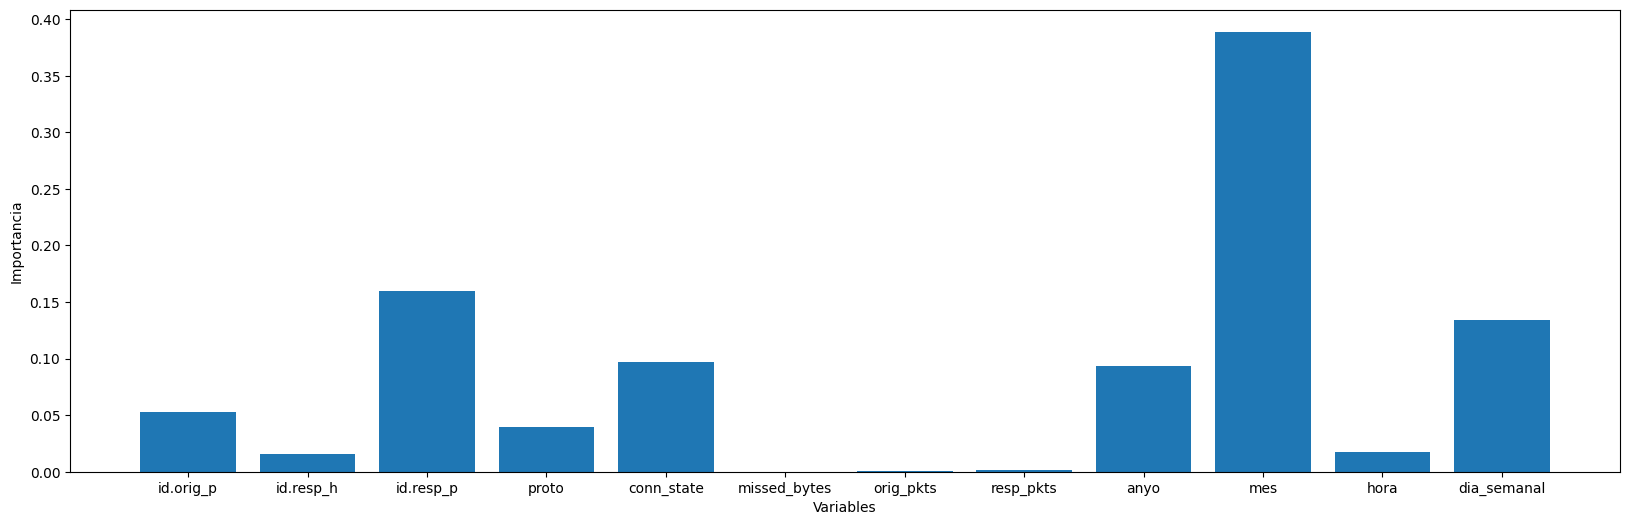

VAMOS A REALIZAR UN , Y AL PASARLE LA RED NEURONAL, NO PASA DEL 0.5 DE ACCURANCY ---- **DESASTRE EL df_malware_TOTAL_target_balanc**

0    16230845
1     8780158
Name: Target, dtype: int64

0    8780158
1    8780158
Name: Target, dtype: int64


In [49]:
df_temp.shape

(17560316, 13)

<AxesSubplot:xlabel='Target', ylabel='Count'>

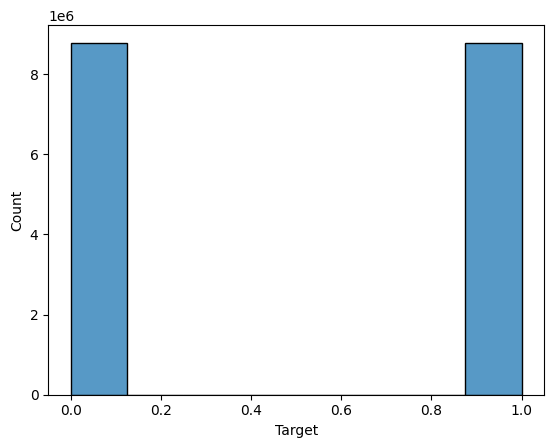

In [54]:
df_temp

,id.orig_p,id.resp_h,id.resp_p,proto,conn_state,missed_bytes,orig_pkts,resp_pkts,anyo,mes,hora,dia_semanal,Target
0,33355.0,169.46.134.213,23.0,tcp,S0,0.0,1.0,0.0,2018,5,4,5,0
1,57682.0,54.39.87.104,992.0,tcp,RSTOS0,0.0,3.0,0.0,2018,12,10,5,0
2,25136.0,162.248.88.215,62336.0,tcp,OTH,0.0,0.0,0.0,2019,9,22,4,0
3,65269.0,118.49.48.152,81.0,tcp,S0,0.0,1.0,0.0,2018,7,13,2,0
4,51828.0,160.146.187.178,23.0,tcp,S0,0.0,6.0,0.0,2019,2,19,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560311,123.0,89.221.218.101,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1
17560312,123.0,89.221.210.188,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1
17560313,123.0,212.111.30.190,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1
17560314,123.0,5.1.56.123,123.0,udp,SF,0.0,2.0,2.0,2019,9,0,5,1


APLICO LABERLENCONDER Y MIXMAX

In [55]:
 #Itera sobre las columnas categóricas(LABEL-ENCONDER)
for col in df_temp.columns[df_temp.dtypes == 'object']:  
    cat = LabelEncoder()
    df_temp[col] = cat.fit_transform(df_temp[col]) 

In [56]:
    #minmax sin redondear
scaler= MinMaxScaler()
array_sca=scaler.fit_transform(df_temp)

In [58]:
df_sca=pd.DataFrame(array_sca)

In [60]:
df_sca.shape

(17560316, 13)

SPLIT

<AxesSubplot:xlabel='12', ylabel='Count'>

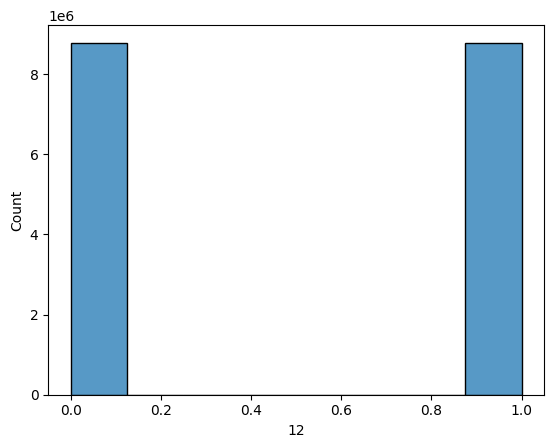

In [64]:
sns.histplot(df_sca.iloc[:,12], bins=8)

In [66]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)


/home/vicevil/miniconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   1767838
         1.0       0.99      1.00      0.99   1744226

    accuracy                           0.99   3512064
   macro avg       0.99      0.99      0.99   3512064
weighted avg       0.99      0.99      0.99   3512064

